In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xesmf as xe
import cartopy.crs as ccrs
import regionmask

In [5]:
ds = xr.open_dataset('../data/t2m_1980-2015_Winter.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 144)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-02-19 10:15:53 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
dr = ds['t2m']

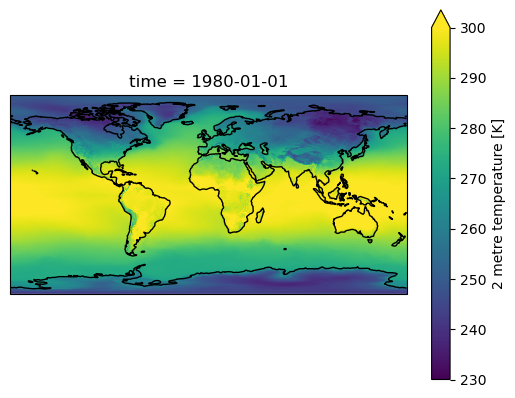

In [7]:
ax = plt.axes(projection=ccrs.PlateCarree())
dr.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()

## INPUT GRID

In [8]:
ds["latitude"].values

array([ 90.  ,  89.75,  89.5 ,  89.25,  89.  ,  88.75,  88.5 ,  88.25,
        88.  ,  87.75,  87.5 ,  87.25,  87.  ,  86.75,  86.5 ,  86.25,
        86.  ,  85.75,  85.5 ,  85.25,  85.  ,  84.75,  84.5 ,  84.25,
        84.  ,  83.75,  83.5 ,  83.25,  83.  ,  82.75,  82.5 ,  82.25,
        82.  ,  81.75,  81.5 ,  81.25,  81.  ,  80.75,  80.5 ,  80.25,
        80.  ,  79.75,  79.5 ,  79.25,  79.  ,  78.75,  78.5 ,  78.25,
        78.  ,  77.75,  77.5 ,  77.25,  77.  ,  76.75,  76.5 ,  76.25,
        76.  ,  75.75,  75.5 ,  75.25,  75.  ,  74.75,  74.5 ,  74.25,
        74.  ,  73.75,  73.5 ,  73.25,  73.  ,  72.75,  72.5 ,  72.25,
        72.  ,  71.75,  71.5 ,  71.25,  71.  ,  70.75,  70.5 ,  70.25,
        70.  ,  69.75,  69.5 ,  69.25,  69.  ,  68.75,  68.5 ,  68.25,
        68.  ,  67.75,  67.5 ,  67.25,  67.  ,  66.75,  66.5 ,  66.25,
        66.  ,  65.75,  65.5 ,  65.25,  65.  ,  64.75,  64.5 ,  64.25,
        64.  ,  63.75,  63.5 ,  63.25,  63.  ,  62.75,  62.5 ,  62.25,
      

In [9]:
ds["longitude"].values

array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)

Resolución de 0.25º x 0.25º

## OUTPUT GRID

Resolución 0.5º x 0.5º

In [10]:
ds_out = xr.Dataset({'latitude': (['latitude'], np.arange(-90, 90.5, 0.5)),
                     'longitude': (['longitude'], np.arange(0, 360.5, 0.5)),
                    }
                   )
ds_out

<xarray.Dataset>
Dimensions:    (latitude: 361, longitude: 721)
Coordinates:
  * latitude   (latitude) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5 360.0
Data variables:
    *empty*

# REGRIDDING

In [11]:
regridder = xe.Regridder(ds, ds_out, "conservative")
regridder  

/home/alonsor/miniconda3/envs/temporal-downscaling/lib/python3.12/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/home/alonsor/miniconda3/envs/temporal-downscaling/lib/python3.12/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_721x1440_361x721.nc 
Reuse pre-computed weights? False 
Input grid shape:           (721, 1440) 
Output grid shape:          (361, 721) 
Periodic in longitude?      False

In [12]:
dr_out = regridder(dr, keep_attrs=True)
dr_out

<xarray.DataArray 't2m' (time: 144, latitude: 361, longitude: 721)>
array([[[ 60.9029  ,  60.903152,  60.903683, ...,  60.90237 ,
          60.90248 ,  60.90282 ],
        [243.84596 , 243.84825 , 243.8499  , ..., 243.8442  ,
         243.84515 , 243.84596 ],
        [244.35321 , 244.35187 , 244.34993 , ..., 244.36256 ,
         244.35832 , 244.35321 ],
        ...,
        [251.36685 , 251.35223 , 251.33876 , ..., 251.39746 ,
         251.38197 , 251.36685 ],
        [251.09384 , 251.08607 , 251.0785  , ..., 251.10976 ,
         251.1018  , 251.09384 ],
        [ 62.666275,  62.665356,  62.664455, ...,  62.66805 ,
          62.667088,  62.666298]],

       [[ 58.632484,  58.633144,  58.63387 , ...,  58.631203,
          58.63186 ,  58.63238 ],
        [234.7401  , 234.745   , 234.7507  , ..., 234.73401 ,
         234.73781 , 234.7401  ],
        [234.42369 , 234.42358 , 234.42354 , ..., 234.42725 ,
         234.42532 , 234.42369 ],
...
        [252.96262 , 252.96733 , 252.97263 , ..., 252.95671 ,
         252.95932 , 252.96262 ],
        [253.10448 , 253.10773 , 253.11104 , ..., 253.10011 ,
         253.10246 , 253.10448 ],
        [ 63.296158,  63.296597,  63.296738, ...,  63.29567 ,
          63.295887,  63.296307]],

       [[ 61.41155 ,  61.411327,  61.411106, ...,  61.411644,
          61.411476,  61.411335],
        [245.82622 , 245.82195 , 245.81749 , ..., 245.8349  ,
         245.8303  , 245.82622 ],
        [246.00697 , 245.99693 , 245.98659 , ..., 246.02954 ,
         246.01825 , 246.00697 ],
        ...,
        [246.13058 , 246.13348 , 246.13623 , ..., 246.1237  ,
         246.12708 , 246.13058 ],
        [246.11873 , 246.11905 , 246.12018 , ..., 246.11629 ,
         246.11765 , 246.11873 ],
        [ 61.51709 ,  61.517113,  61.517365, ...,  61.51709 ,
          61.51709 ,  61.51709 ]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2015-12-01
  * latitude   (latitude) float64 -90.0 -89.5 -89.0 -88.5 ... 89.0 89.5 90.0
  * longitude  (longitude) float64 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5 360.0
Attributes:
    units:          K
    long_name:      2 metre temperature
    regrid_method:  conservative

Text(0.5, 1.0, 'Mes 1 Año 1980')

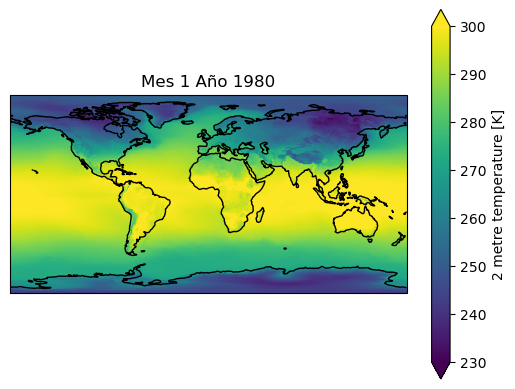

In [13]:
ax = plt.axes(projection=ccrs.PlateCarree())
k = 0 # Posición temporal
dr_out.isel(time=k).plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()
plt.title('Mes ' + str(dr_out.isel(time=k).time.dt.month.values) + ' Año ' + str(dr_out.isel(time=k).time.dt.year.values))

Text(0.5, 1.0, 'Temperatura media invierno 1980-2015')

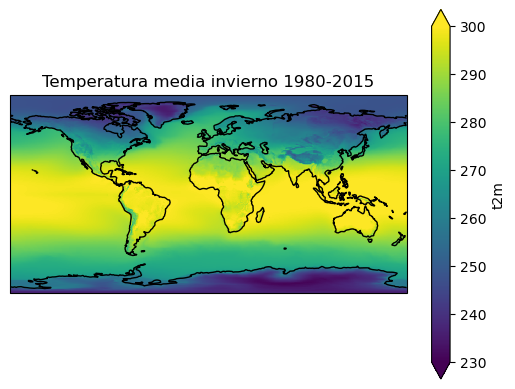

In [14]:
dr_out_mean = dr_out.mean(dim='time')
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out_mean.plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()
plt.title('Temperatura media invierno 1980-2015')


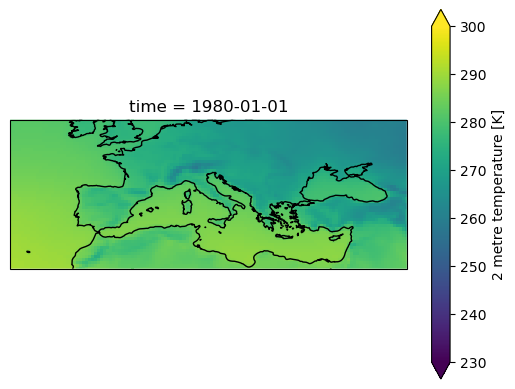

In [15]:
# Se muestra solo la región del Mediterráneo
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out.isel(time=0).plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()
ax.set_extent([-20, 45, 30, 50])

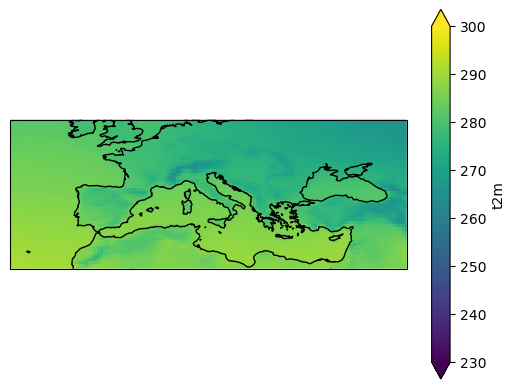

In [16]:
# Se muestra la media de todos los años para la región del Mediterráneo
dr_out_med = dr_out.mean(dim='time')
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out_med.plot.pcolormesh(ax=ax, vmin=230, vmax=300)
ax.coastlines()
ax.set_extent([-20, 45, 30, 50])


# REGIÓN MEDITERRÁNEO

In [32]:
srex = regionmask.defined_regions.srex
srex

<regionmask.Regions 'SREX'>
Source:   Seneviratne et al., 2012 (https://www.ipcc.ch/site/assets/uploads/2...
overlap:  False

Regions:
 1 ALA       Alaska/N.W. Canada
 2 CGI     Canada/Greenl./Icel.
 3 WNA         W. North America
 4 CNA         C. North America
 5 ENA         E. North America
..  ..                      ...
22 EAS                  E. Asia
23 SAS                  S. Asia
24 SEA                S.E. Asia
25 NAU             N. Australia
26 SAU S. Australia/New Zealand

[26 regions]

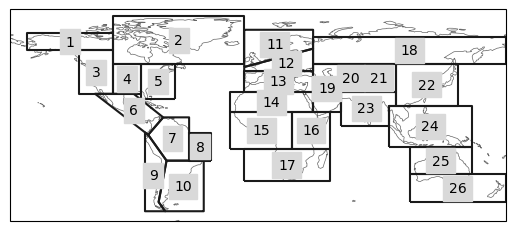

In [33]:
srex.plot();

In [34]:
import matplotlib.patheffects as pe

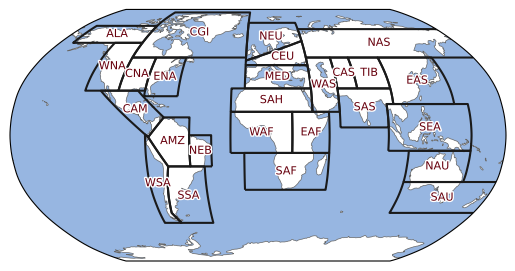

In [35]:
text_kws = dict(
    bbox=dict(color="none"),
    path_effects=[pe.withStroke(linewidth=2, foreground="w")],
    color="#67000d",
    fontsize=8,
)

ax = srex.plot(
    projection=ccrs.Robinson(), label="abbrev", add_ocean=True, text_kws=text_kws
)

ax.set_global()

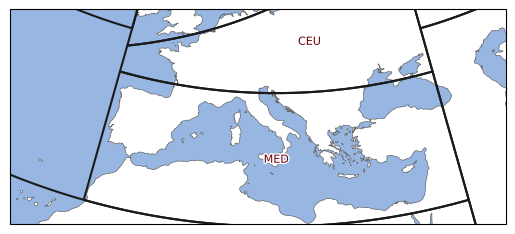

In [56]:
projection = ccrs.LambertConformal(central_longitude=15)
ax = srex.plot(
    projection=projection, label="abbrev", add_ocean=True, text_kws=text_kws, resolution='50m'
)
ax.set_extent([-20, 45, 30, 50], crs=ccrs.PlateCarree())